# Assignment Solution for SPA623M

**Name : Ashwin**

**Roll no: 241310004**

## Q 1. Derive the Simpson 3/8 rule by integrating the interpolating polynomials.

In [1]:
import sympy as sp

x = sp.symbols('x')
a, h = sp.symbols('a h')

x0 = a
x1 = a + h
x2 = a + 2*h
x3 = a + 3*h

xarr = [x0, x1, x2, x3]

f0, f1, f2, f3 = sp.symbols('f0 f1 f2 f3')

def L(x,xarr,i):
    return sp.prod([(x - xarr[j]) / (xarr[i] - xarr[j]) for j in range(len(xarr)) if j != i])

P3 = f0*L(x,xarr,0) + f1*L(x,xarr,1)  + f2*L(x,xarr,2)  + f3*L(x,xarr,3) 

integral = sp.integrate(P3, (x, x0, x3))
integral = sp.simplify(integral)

integral


3*h*(f0 + 3*f1 + 3*f2 + f3)/8

## Q2. Using mid-point rule, trapezoid rules and Simpson 1/3 rule, show, compute the convergence rate, and compute with the actual values.




## ANS 

**Mid-point Rule**

$$ M_n = \sum_{i=1}^{n} f(m_i) \Delta x $$


**Trapezoid Rule**

$$ \int_a^b f(x) dx \approx \sum_{i=0}^{n-1} h \frac{f(x_i) + f(x_{i+1})}{2} $$
  
**Simpson 1/3 rule**

$$ \int_a^b f(x) \, dx \approx \frac{b - a}{6} \left( f(a) + 4f\left( \frac{a + b}{2} \right) + f(b) \right) $$




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import sympy as sp

def Simpson_3rule_i(f,initial):
    [a,b,_] = initial
    h = (b-a)/2
    x = [a,a+h,b]
    ans = h/3*(f(x[0]) + 4*f(x[1]) + f(x[2]))
    return ans

def Simpson_3rule(f,initial):
    [a,b,n] = initial
    h = (b-a)/n
    x = np.linspace(a,b,n+1)
    sum = 0
    for i in range(0,len(x)-1,2):
        try :
            sum = sum + Simpson_3rule_i(f,[x[i],x[i+2],n])
        except:
            print(f"Error at x = {x[i]} but contuining")

    return sum


def Midpoint_rule(f,initial):
    [a,b,n] = initial
    x = np.linspace(a,b,n+1)
    #print(x)
    h = (b-a)/n
    sum = 0
    for i in range(len(x)-1):
        mi = (x[i]+x[i+1])/2
        #print(mi)
        sum = sum + f(mi) * h
    return sum

def Trapezoid_rule(f,initial):
    [a,b,n] = initial
    h = (b-a)/n
    
    x = np.linspace(a,b,n+1)
    #print(x)
    
    sum = 0
    for i in range(n):
        sum = sum + h * (f(x[i])+f(x[i+1]))/2
        #print(x[i])
    return sum

def Composit_Simpson_rule(f,initial):
    [a,b,n] = initial
    
    S1 = f(a)
    
    S2 = 0
    h = (b-a)/n
    for i in range(1,n,2):
        x = a + i*h
        #print(f"S2 n = {i} x = {x}")
        S2 = S2 + f(x)
    S2 = 4 * S2

    S3 = 0
    for i in range(2,n-1,2):
        x = a + i*h
        #print(f"S3 n = {i} x = {x}")
        S3 = S3 + f(x)
    S3 = 2*S3

    S4 = f(b)
    
    #print(S1)
    #print(S4)

    return h/3*(S1 + S2 + S3 + S4)

def convergence_rate(f,initial, rule, exact_value, max_n=100):
    [a,b,_] = initial
    errors = []
    intervals = []
    for nc in range(2, max_n+1):
        approx = rule(f, [a,b,nc])
        error = abs(approx - exact_value)
        errors.append(error)
        intervals.append(nc)
    return intervals, errors

def plot_convergence(intervals, errors,label):
    plt.plot(intervals, errors, label=label)
    #plt.yscale('log')
    #plt.xscale('log')


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import sympy as sp

# Modified Definations with Error Handaling

def Midpoint_rule(f,initial):
    [a,b,n] = initial
    x = np.linspace(a,b,n+1)
    #print(x)
    h = (b-a)/n
    sum = 0
    for i in range(len(x)-1):
        mi = (x[i]+x[i+1])/2
        #print(mi)
        try :
            sum = sum + f(mi) * h
        except:
            print(f"Error at {mi} but continuing")
    return sum

def Trapezoid_rule(f,initial):
    [a,b,n] = initial
    h = (b-a)/n

    # To handele the case when a = 0
    if a == 0:
        h = (b-a)/n
        a = h
        n = n-1
    
    x = np.linspace(a,b,n+1)
    #print(x)
    
    sum = 0
    for i in range(n):
        try :
            sum = sum + h * (f(x[i])+f(x[i+1]))/2
        except:
            print(f"Error at {x[i]} but continuing")
    
        #print(x[i])
    return sum

def Simpson_3rule_i(f,initial):
    [a,b,_] = initial
    h = (b-a)/2
    x = [a ,(a+b)/2 ,b]
    ans = (b-a)/6*(f(x[0]) + 4*f(x[1]) + f(x[2]))
    return ans

def Simpson_3rule(f,initial):
    [a,b,n] = initial
    h = (b-a)/n
    x = np.linspace(a,b,n+1)
    sum = 0
    for i in range(0,len(x)-2,2):
        sum = sum + Simpson_3rule_i(f,[x[i],x[i+2],2])
        # try :
        #     sum = sum + Simpson_3rule_i(f,[x[i],x[i+2],2])
        # except:
        #     print(f"Error at x = {x[i]} but contuining")

    return sum



def convergence_rate(f,initial, rule, exact_value, max_n=100):
    [a,b,_] = initial
    errors = []
    intervals = []
    for nc in range(2, max_n+1,2):
        approx = rule(f, [a,b,nc])
        error = abs(approx - exact_value)
        errors.append(error)
        intervals.append(nc)
    return intervals, errors

def plot_convergence(intervals, errors,label):
    plt.plot(intervals, errors, label=label)
    #plt.yscale('log')
    #plt.xscale('log')


def Simpson_3rule_i(f, a, b):
    h = (b - a) / 2
    x = [a, (a + b) / 2, b]
    ans = (b - a) / 6 * (f(x[0]) + 4 * f(x[1]) + f(x[2]))
    return ans

def Simpson_3rule(f, initial):
    [a, b, n] = initial

    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's 1/3 rule")
    
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    sum = 0
    
    for i in range(0, len(x) - 1, 2):
        try:
            sum = sum + Simpson_3rule_i(f, x[i], x[i + 2])
        except Exception as e:
            print(f"Error at x = {x[i]} but continuing")
            print(e)


    return sum




### 1.$$ I_1 = \int_0^1 x^x \, dx \approx 0.783430510712 $$


In [4]:

f = lambda x: pow(x,x)

a ,b ,n = 0, 1, 1000000
initial = [a,b,n]

ans_midpoint = round( Midpoint_rule(f,initial),12)
ans_trapezoid = round( Trapezoid_rule(f,initial),12)
ans_simpson = round( Simpson_3rule(f,initial),12)

ans_quad = round(quad(f, a, b)[0],12)

print(f"True Value : {ans_quad}")

print(f"Midpoint rule : {ans_midpoint} ; with Truncation error : {abs(ans_midpoint - ans_quad)}")
print(f"Trapezoid rule : {ans_trapezoid} ; with Truncation error : {abs(ans_trapezoid - ans_quad)}")
print(f"Simpson 1/3 rule : {ans_simpson} ; with Truncation error : {abs(ans_simpson - ans_quad)}")


True Value : 0.783430510712
Midpoint rule : 0.783430510711 ; with Truncation error : 9.999778782798785e-13
Trapezoid rule : 0.78342951072 ; with Truncation error : 9.999919999836848e-07
Simpson 1/3 rule : 0.783430510712 ; with Truncation error : 0.0


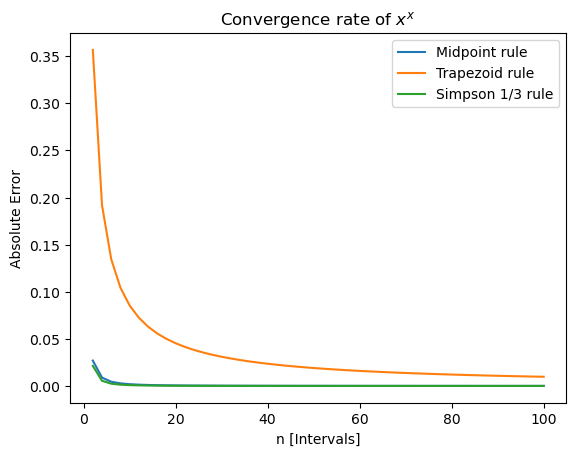

In [5]:

plt.figure()
x = sp.symbols('x')
f_expr = x ** x
f_latex = sp.latex(f_expr)

plt.title(f'Convergence rate of ${f_latex}$')

intervals, errors = convergence_rate(f,initial, Midpoint_rule, ans_quad, max_n=100)
plot_convergence(intervals, errors,"Midpoint rule")

intervals, errors = convergence_rate(f,initial, Trapezoid_rule, ans_quad, max_n=100)
plot_convergence(intervals, errors,"Trapezoid rule")

intervals, errors = convergence_rate(f,initial, Simpson_3rule, ans_quad, max_n=100)
plot_convergence(intervals, errors,"Simpson 1/3 rule")

plt.xlabel('n [Intervals]')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()



### 2.$$ I_2 = \int_0^1 \ln\left(\frac{1}{x}\right) \sin(x) \, dx \approx 0.239811742001 $$



In [6]:

f = lambda x: np.log(pow(x,-1))*np.sin(x)

a ,b ,n = 0, 1, 10
initial = [a,b,n]

ans_quad = round(quad(f, a, b)[0],12)
print(f"True Value : {ans_quad}")

ans_midpoint = round( Midpoint_rule(f,initial),12)
ans_trapezoid = round( Trapezoid_rule(f,initial),12)
ans_simpson = round( Simpson_3rule(f,initial),12)



print(f"Midpoint rule : {ans_midpoint} ; with Truncation error : {abs(ans_midpoint - ans_quad)}")
print(f"Trapezoid rule : {ans_trapezoid} ; with Truncation error : {abs(ans_trapezoid - ans_quad)}")
print(f"Simpson 1/3 rule : {ans_simpson} ; with Truncation error : {abs(ans_simpson - ans_quad)}")





True Value : 0.239811742001
Midpoint rule : 0.241660705214 ; with Truncation error : 0.0018489632129999878
Trapezoid rule : 0.224042985566 ; with Truncation error : 0.015768756435000003
Simpson 1/3 rule : nan ; with Truncation error : nan


/tmp/ipykernel_20317/2398067075.py:1: RuntimeWarning: divide by zero encountered in scalar power
  f = lambda x: np.log(pow(x,-1))*np.sin(x)
/tmp/ipykernel_20317/2398067075.py:1: RuntimeWarning: invalid value encountered in scalar multiply
  f = lambda x: np.log(pow(x,-1))*np.sin(x)


/tmp/ipykernel_20317/2398067075.py:1: RuntimeWarning: divide by zero encountered in scalar power
  f = lambda x: np.log(pow(x,-1))*np.sin(x)
/tmp/ipykernel_20317/2398067075.py:1: RuntimeWarning: invalid value encountered in scalar multiply
  f = lambda x: np.log(pow(x,-1))*np.sin(x)


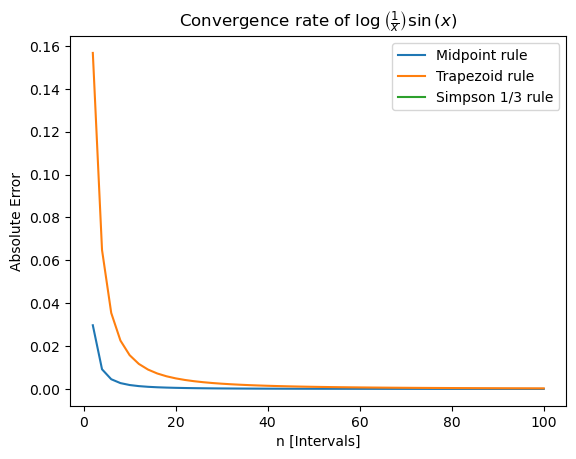

In [7]:
x = sp.symbols('x')
f_expr = sp.log(x**-1)*sp.sin(x)
f_latex = sp.latex(f_expr)

plt.title(f'Convergence rate of ${f_latex}$')

intervals, errors = convergence_rate(f,initial, Midpoint_rule, ans_quad, max_n=100)
plot_convergence(intervals, errors,"Midpoint rule")

intervals, errors = convergence_rate(f,initial, Trapezoid_rule, ans_quad, max_n=100)
plot_convergence(intervals, errors,"Trapezoid rule")

intervals, errors = convergence_rate(f,initial, Simpson_3rule, ans_quad, max_n=100)
plot_convergence(intervals, errors,"Simpson 1/3 rule")


plt.xlabel('n [Intervals]')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()


### 3. $$ I_3 = \int_0^1 x^5 e^{-2x} \, dx = \frac{1-3e^{-2}}{12} \approx 0.049499512524 $$


In [8]:

f = lambda x: pow(x,5)* pow(np.e,-2*pow(x,3))

a ,b ,n = 0, 1, 1000000
initial = [a,b,n]

ans_quad = round(quad(f, a, b)[0],12)
print(f"True Value : {ans_quad}")

print(f"True Value Anylatical : {round((1-3*np.e**-2)/12,12)}")


ans_midpoint = round( Midpoint_rule(f,initial),12)
ans_trapezoid = round( Trapezoid_rule(f,initial),12)
ans_simpson = round( Simpson_3rule(f,initial),12)



print(f"Midpoint rule : {ans_midpoint} ; with Truncation error : {abs(ans_midpoint - ans_quad)}")
print(f"Trapezoid rule : {ans_trapezoid} ; with Truncation error : {abs(ans_trapezoid - ans_quad)}")
print(f"Simpson 1/3 rule : {ans_simpson} ; with Truncation error : {abs(ans_simpson - ans_quad)}")

True Value : 0.049499512524
True Value Anylatical : 0.049499512524
Midpoint rule : 0.049499512524 ; with Truncation error : 0.0
Trapezoid rule : 0.049499512524 ; with Truncation error : 0.0
Simpson 1/3 rule : 0.049499512524 ; with Truncation error : 0.0


In [9]:
# solved using Sympy

x = sp.Symbol('x')
f_expr = x**5 * sp.exp(-2*x**3)

I3 = sp.integrate(f_expr, (x, 0, 1))
I3

1/12 - exp(-2)/4

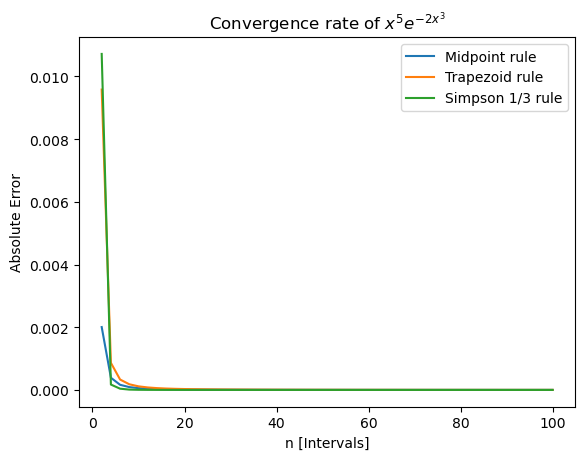

In [10]:
x = sp.symbols('x')
f_expr = x**5 * sp.exp(-2*x**3)
f_latex = sp.latex(f_expr)

plt.title(f'Convergence rate of ${f_latex}$')

intervals, errors = convergence_rate(f,initial, Midpoint_rule, ans_quad, max_n=100)
plot_convergence(intervals, errors,"Midpoint rule")

intervals, errors = convergence_rate(f,initial, Trapezoid_rule, ans_quad, max_n=100)
plot_convergence(intervals, errors,"Trapezoid rule")

intervals, errors = convergence_rate(f,initial, Simpson_3rule, ans_quad, max_n=100)
plot_convergence(intervals, errors,"Simpson 1/3 rule")


plt.xlabel('n [Intervals]')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()



### 4. $$ I_4 = \int_0^1 \left( x - \frac{x^3}{3!} + \frac{x^5}{5!} \right) dx = \frac{1}{2} - \frac{1}{4!} + \frac{1}{6!}  \approx 0.459722222222 $$ 

In [11]:
def fac(n):
    if n == 0:
        return 1
    else:
        return n * fac(n-1)

import sympy as sp
x = sp.symbols('x')
sp_f = x - x**3 / sp.factorial(3) + x**5 / sp.factorial(5)
I4 = sp.integrate(sp_f, (x, 0, 1))

print(I4)

f = lambda x: x-x**3/fac(3) + x**5/fac(5)

a ,b ,n = 0, 1, 1000000
initial = [a,b,n]

ans_quad = round(quad(f, a, b)[0],12)
print(f"True Value : {ans_quad}")

print(f"True Value Anylatical : {round(  1/2-1/fac(4)+1/fac(6) ,12)}")


ans_midpoint = round( Midpoint_rule(f,initial),12)
ans_trapezoid = round( Trapezoid_rule(f,initial),12)
ans_simpson = round( Simpson_3rule(f,initial),12)



print(f"Midpoint rule : {ans_midpoint} ; with Truncation error : {abs(ans_midpoint - ans_quad)}")
print(f"Trapezoid rule : {ans_trapezoid} ; with Truncation error : {abs(ans_trapezoid - ans_quad)}")
print(f"Simpson 1/3 rule : {ans_simpson} ; with Truncation error : {abs(ans_simpson - ans_quad)}")

331/720
True Value : 0.459722222222
True Value Anylatical : 0.459722222222
Midpoint rule : 0.459722222222 ; with Truncation error : 0.0
Trapezoid rule : 0.459722222222 ; with Truncation error : 0.0
Simpson 1/3 rule : 0.459722222222 ; with Truncation error : 0.0


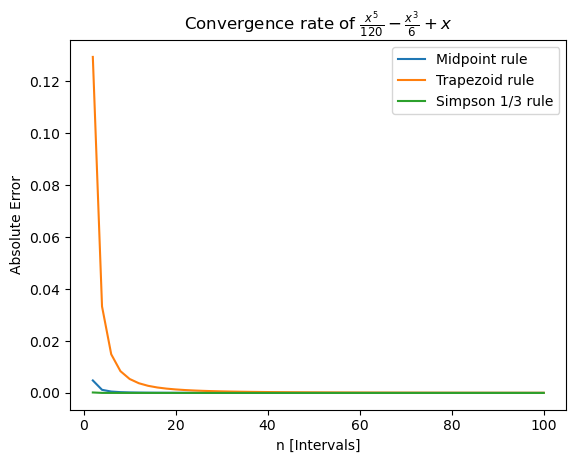

In [12]:
x = sp.symbols('x')
f_expr = x - x**3 / sp.factorial(3) + x**5 / sp.factorial(5)
f_latex = sp.latex(f_expr)

plt.title(f'Convergence rate of ${f_latex}$')

intervals, errors = convergence_rate(f,initial, Midpoint_rule, ans_quad, max_n=100)
plot_convergence(intervals, errors,"Midpoint rule")

intervals, errors = convergence_rate(f,initial, Trapezoid_rule, ans_quad, max_n=100)
plot_convergence(intervals, errors,"Trapezoid rule")

intervals, errors = convergence_rate(f,initial, Simpson_3rule, ans_quad, max_n=100)
plot_convergence(intervals, errors,"Simpson 1/3 rule")


plt.xlabel('n [Intervals]')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()

## 3. Find the total arc length and the area of the ellipse $ x^2 + \frac{y^2}{9} = 1 $, both analytically and numerically.

In [13]:
import sympy as sp 

x = sp.symbols('x')
y = sp.symbols('y')

ellipse_eq = sp.Eq(x**2 + y**2 / 9, 1)

f = sp.solve(ellipse_eq, y)
f_y = sp.lambdify(x, f[1], 'numpy')

def Area(f,initial):
    [a,b] = initial
    return sp.integrate(f, (x, a, b))


def Arc_length(f,initial):
    [a,b] = initial
    return sp.integrate(sp.sqrt(1 + sp.diff(f)**2), (x, a, b))

a ,b = -1, 1
initial = [a,b]

ans_area = 2 * round(Area(f[1],initial),12)
ans_arc_length = 2 * round(Arc_length(f[1],initial),12)

print(f"Area of  {ellipse_eq} Ellipse  = {ans_area} ")
print(f"Arc Length of  {ellipse_eq} Ellipse  = {ans_arc_length}")


Area of  Eq(x**2 + y**2/9, 1) Ellipse  = 9.424777960770 
Arc Length of  Eq(x**2 + y**2/9, 1) Ellipse  = 13.36489322056


In [14]:
# Analytical Solution

a = 1
b = 3
Area = np.pi * a * b

print(f"Area of Ellipse = {Area}")

h = (a-b)**2 / (a+b)**2
permimeter = np.pi * (a+b) * (1 +  3 * h / (10 + np.sqrt(4 - 3 * h)))

print(f"Perimeter of Ellipse = {permimeter}")

Area of Ellipse = 9.42477796076938
Perimeter of Ellipse = 13.36489277982672


## Q4. Evaluate the following using composite Simpson’s rule:




### ANS 

**Composit Simpsons rule**

$$\int_{a}^{b} f(x) dx \approx \frac{(b-a)}{3} \bigg(f(a) + 4(\sum_{i=1, i \ odd}^{n-1} f(x_i)) + 2(\sum_{i=2,i \ even}^{n-2} f(x_i)) + f(b)\bigg)$$


In [15]:


def Composit_Simpson_rule(f,initial):
    [a,b,n] = initial

    # To handele the case when a = 0
    if a == 0:
        h = (b-a)/n
        a = h
        n = n-1

    
    try :
        S1 = f(a)
    except:
        print(f"Error at {b} but continuing")
    
    S2 = 0
    h = (b-a)/n
    for i in range(1,n,2):
        x = a + i*h
        #print(f"S2 n = {i} x = {x}")
        try :
            S2 = S2 + f(x)
        except:
            print(f"Error at {x} but continuing")
        
    S2 = 4 * S2

    S3 = 0
    for i in range(2,n-1,2):
        x = a + i*h
        #print(f"S3 n = {i} x = {x}")
        try :
            S3 = S3 + f(x)
        except:
            print(f"Error at {x} but continuing")
        
    S3 = 2*S3

   
    try :
        S4 = f(b)
    except:
        print(f"Error at {b} but continuing")
    
    
    #print(S1)
    #print(S4)

    return h/3*(S1 + S2 + S3 + S4)

def Composit_Simpson_rule(f, initial):
    [a, b, n] = initial
    
    h = (b - a) / n
    
    try:
        S1 = f(a)
    except :
        S1 = 0
        print(f"Error at a = {a} but continuing with S1 = 0")
    
    try:
        S4 = f(b)
    except:
        S4 = 0
        print(f"Error at b = {b} but continuing with S4 = 0")
    
    S2 = 0
    for i in range(1, n, 2):
        x = a + i * h
        try:
            S2 += f(x)
        except:
            print(f"Error at x = {x} (odd index) but continuing")

    S2 = S2 * 4
    
    # Sum of f(x) at even indices (multiplied by 2)
    S3 = 0
    for i in range(2, n - 1, 2):
        x = a + i * h
        try:
            S3 += f(x)
        except (ValueError, ZeroDivisionError, OverflowError):
            print(f"Error at x = {x} (even index) but continuing")
    
    S3 = S3 * 2
    
    return h / 3 * (S1 + S2 + S3 + S4)





### 1. $$ I_1 = \int_0^1 x^x \, dx \approx 0.783430510712 $$


In [16]:

f = lambda x: pow(x,x) 

a ,b ,n = 0, 1, 10000
initial = [a,b,n]

ans_quad = round(quad(f, a, b)[0],12)
print(f"True Value : {ans_quad}")


ans_simpson = round( Composit_Simpson_rule(f,initial),12)

print(f"Composit Simpson rule : {ans_simpson} ; with Truncation error : {abs(ans_simpson - ans_quad)}")

True Value : 0.783430510712
Composit Simpson rule : 0.783430511483 ; with Truncation error : 7.710000415883655e-10



### 2. $$ I_2 = \int_0^{0.983} x^x dx \approx 0.766573383391 $$


In [17]:

f = lambda x: pow(x,x) 

a ,b ,n = 0, 0.983, 10000
initial = [a,b,n]

ans_quad = round(quad(f, a, b)[0],12)
print(f"True Value : {ans_quad}")


ans_simpson = round( Composit_Simpson_rule(f,initial),12)

print(f"Composit Simpson rule : {ans_simpson} ; with Truncation error : {abs(ans_simpson - ans_quad)}")

True Value : 0.766573383391
Composit Simpson rule : 0.766573384136 ; with Truncation error : 7.449999506192739e-10


### 3.  To see the inaccuracies of the abscissas ( $ a_j $ ), perform integration with (I) $ a_j = a_0 +jh $, and (II) $ a_j = a_{j-2} + 2h $ , and compare with the exact values.

In [18]:

def Composit_Simpson_rule_jh(f, initial):
    [a, b, n] = initial
    
    h = (b - a) / n

    x = np.arange(a, b, h)
    
    try:
        S1 = f(x[0])
    except :
        S1 = 0
        print(f"Error at a = {a} but continuing with S1 = 0")
    
    try:
        S4 = f(x[-1])
    except:
        S4 = 0
        print(f"Error at b = {b} but continuing with S4 = 0")
    
    S2 = 0
    for i in range(1, len(x), 2):
        try:
            S2 += f(x[i])
        except:
            print(f"Error at x = {x} (odd index) but continuing")

    S2 = S2 * 4
    
    S3 = 0
    for i in range(2, len(x) - 1, 2):
        try:
            S3 += f(x[i])
        except (ValueError, ZeroDivisionError, OverflowError):
            print(f"Error at x = {x} (even index) but continuing")
    
    S3 = S3 * 2
    
    return h / 3 * (S1 + S2 + S3 + S4)


def Composit_Simpson_rule_2h(f, initial):
    [a, b, n] = initial
    
    h = (b - a) / n

    x = np.arange(a, b, 2*h)
    
    try:
        S1 = f(x[0])
    except :
        S1 = 0
        print(f"Error at a = {a} but continuing with S1 = 0")
    
    try:
        S4 = f(x[-1])
    except:
        S4 = 0
        print(f"Error at b = {b} but continuing with S4 = 0")
    
    S2 = 0
    for i in range(1, len(x), 2):
        try:
            S2 += f(x[i])
        except:
            print(f"Error at x = {x} (odd index) but continuing")

    S2 = S2 * 4
    
    S3 = 0
    for i in range(2, len(x) - 1, 2):
        try:
            S3 += f(x[i])
        except (ValueError, ZeroDivisionError, OverflowError):
            print(f"Error at x = {x} (even index) but continuing")
    
    S3 = S3 * 2
    
    return h / 3 * (S1 + S2 + S3 + S4)


In [19]:

f = lambda x: pow(x,x) 

a ,b ,n = 0, 1, 100
initial = [a,b,n]

ans_quad = round(quad(f, a, b)[0],12)
print(f"True Value : {ans_quad}")


ans_simpson = round( Composit_Simpson_rule(f,initial),12)
ans_simpson_jh = round( Composit_Simpson_rule_jh(f,initial),12)
ans_simpson_2h = round( Composit_Simpson_rule_2h(f,initial),12)



print(f"Composit Simpson rule : {ans_simpson} ; with Truncation error : {abs(ans_simpson - ans_quad)}")
print(f"Composit Simpson rule edited absissa jh : {ans_simpson_jh} ; with Truncation error : {abs(ans_simpson_jh - ans_quad)}")
print(f"Composit Simpson rule edited absissa 2h : {ans_simpson_2h} ; with Truncation error : {abs(ans_simpson_2h - ans_quad)}")


True Value : 0.783430510712
Composit Simpson rule : 0.783438389761 ; with Truncation error : 7.879049000014682e-06
Composit Simpson rule edited absissa jh : 0.783405388106 ; with Truncation error : 2.5122605999960967e-05
Composit Simpson rule edited absissa 2h : 0.391665908231 ; with Truncation error : 0.391764602481


In [20]:

f = lambda x: pow(x,x) 

a ,b ,n = 0, 0.983, 100
initial = [a,b,n]

ans_quad = round(quad(f, a, b)[0],12)
print(f"True Value : {ans_quad}")


ans_simpson = round( Composit_Simpson_rule(f,initial),12)
ans_simpson_jh = round( Composit_Simpson_rule_jh(f,initial),12)
ans_simpson_2h = round( Composit_Simpson_rule_2h(f,initial),12)



print(f"Composit Simpson rule : {ans_simpson} ; with Truncation error : {abs(ans_simpson - ans_quad)}")
print(f"Composit Simpson rule edited absissa jh : {ans_simpson_jh} ; with Truncation error : {abs(ans_simpson_jh - ans_quad)}")
print(f"Composit Simpson rule edited absissa 2h : {ans_simpson_2h} ; with Truncation error : {abs(ans_simpson_2h - ans_quad)}")


True Value : 0.766573383391
Composit Simpson rule : 0.766580994567 ; with Truncation error : 7.611176000010822e-06
Composit Simpson rule edited absissa jh : 0.76655017356 ; with Truncation error : 2.3209831000015058e-05
Composit Simpson rule edited absissa 2h : 0.38324111123 ; with Truncation error : 0.383332272161


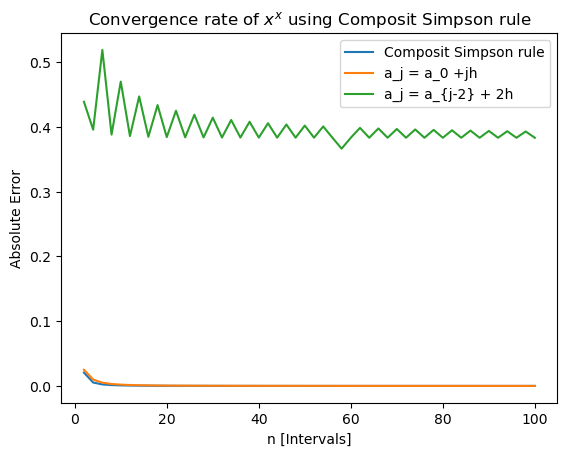

In [21]:
x = sp.symbols('x')
f_expr = x**x
f_latex = sp.latex(f_expr)

plt.title(f'Convergence rate of ${f_latex}$ using Composit Simpson rule')

intervals, errors = convergence_rate(f,initial, Composit_Simpson_rule, ans_quad, max_n=100)
plot_convergence(intervals, errors,"Composit Simpson rule")

intervals, errors = convergence_rate(f,initial, Composit_Simpson_rule_jh, ans_quad, max_n=100)
plot_convergence(intervals, errors,"a_j = a_0 +jh")

intervals, errors = convergence_rate(f,initial, Composit_Simpson_rule_2h, ans_quad, max_n=100)
plot_convergence(intervals, errors,"a_j = a_{j-2} + 2h")


plt.xlabel('n [Intervals]')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()


## Q 5. Derive quadrature formulas of the form $ \int_0^1 \sqrt{x} f(x) \, dx \approx \sum_{i=0}^{n} w_i \, f\left(\frac{i}{n}\right)  $ , which are exact for all polynomials of degree less than or equal to n (use n=2,4,8). Use these formula to evaluate the following integrals.






In [43]:
import sympy as sp

def weights_fn(n):
 
    weight_symb = sp.symbols(f'w0:{n+1}')
    
    equations = []
    
    for k in range(n+1):
        
        integral_value = 1 / (k + 3/2)
        
        equation = sp.Sum(weight_symb[i] * (i/n)**k for i in range(n+1))
        equations.append(sp.Eq(equation, integral_value))
    
    solutions = list(sp.solve(equations, weight_symb).values())
    
    return solutions

def quadrature_approximation(weights, f, n):
    quadrature_sum = sum(weights[i] * f(i/n) for i in range(n+1))
    return quadrature_sum


In [60]:
import numpy as np

# Specify the number of points (n)
n = 2  # Example: 4-point Gaussian quadrature

# Get the roots (xi) and weights (wi) using numpy's leggauss function
roots, weights = np.polynomial.legendre.leggauss(n)

# Print the results
print("Roots (xi):", roots)
print("Weights (wi):", weights)


Roots (xi): [-0.57735027  0.57735027]
Weights (wi): [1. 1.]


In [61]:
def fn(x):
    return np.sqrt(x) * np.sin(x)

def gaussfn(fn,x):
    a = 0
    b = 1

    return (b-a)/2* fn( ( b-a)/2*x+(b+a)/2 ) 



n = 40  # Example: 4-point Gaussian quadrature

# Get the roots (xi) and weights (wi) using numpy's leggauss function
roots, weights = np.polynomial.legendre.leggauss(n)

print("Roots (xi):", roots)
print("Weights (wi):", weights)

a = 0
b = 1

sum = 0
for i in range(n):
    sum = sum + weights[i] * gaussfn(fn,roots[i])
print(sum)


Roots (xi): [-0.99823771 -0.99072624 -0.97725995 -0.95791682 -0.93281281 -0.90209881
 -0.8659595  -0.82461223 -0.77830565 -0.72731826 -0.67195668 -0.61255389
 -0.54946713 -0.4830758  -0.4137792  -0.34199409 -0.26815219 -0.19269758
 -0.11608407 -0.03877242  0.03877242  0.11608407  0.19269758  0.26815219
  0.34199409  0.4137792   0.4830758   0.54946713  0.61255389  0.67195668
  0.72731826  0.77830565  0.82461223  0.8659595   0.90209881  0.93281281
  0.95791682  0.97725995  0.99072624  0.99823771]
Weights (wi): [0.00452128 0.01049828 0.01642106 0.02224585 0.02793701 0.0334602
 0.03878217 0.04387091 0.04869581 0.05322785 0.05743977 0.06130624
 0.06480401 0.06791205 0.07061165 0.07288658 0.07472317 0.07611036
 0.07703982 0.07750595 0.07750595 0.07703982 0.07611036 0.07472317
 0.07288658 0.07061165 0.06791205 0.06480401 0.06130624 0.05743977
 0.05322785 0.04869581 0.04387091 0.03878217 0.0334602  0.02793701
 0.02224585 0.01642106 0.01049828 0.00452128]
0.3642219312753443


1. $$ I_1 = \int_0^1 \sqrt{x}  \sin(x) \, dx \approx 0.364221932032 $$


In [62]:

x = sp.symbols('x')

f_exp = sp.sqrt(x) * sp.sin(x)

integral_result = sp.integrate(f_exp, (x, 0, 1)).evalf()

print(f" Integral analytically {f_exp}  = ", integral_result)

def f(x):
    return sp.sin(x)

#integral = quadrature_approximation(weights_fn(2), f, 2)
#print(f"Integral of {f_exp} approximated using  quadrature = {integral}; and Truncation error ={integral - integral_result } ")




 Integral analytically sqrt(x)*sin(x)  =  0.364221932032132



2. $$ I_2 = \int_0^1 \sqrt{x}  \cos(x) \, dx \approx 0.531202683085 $$

# THE END